In [2]:
import random
import numpy as np
import  matplotlib.pyplot as plt
from cs231n.data_utils import load_CIFAR10

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


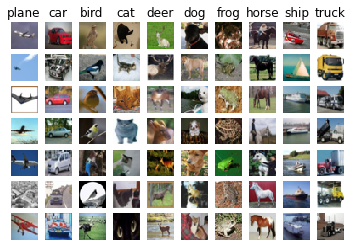

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500 

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

# 在前49000里面随机找 500个不重复的下标
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Dev data shape: ', X_dev.shape)
print('Dev labels shape: ', y_dev.shape)

Training data shape:  (49000, 32, 32, 3)
Training labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)
Dev data shape:  (500, 32, 32, 3)
Dev labels shape:  (500,)


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('Dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
Dev data shape:  (500, 3072)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


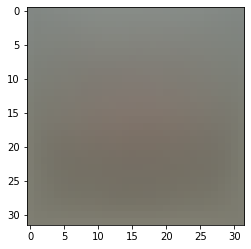

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [7]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

In [8]:
from cs231n.classifiers.linear_svm import svm_loss_naive

W = np.random.randn(3073, 10)* 0.0001

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss,))

loss: 9.214174


In [9]:
from cs231n.gradient_check import grad_check_sparse

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)
f =lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]  
# 只接收一个参数 w 。本应该返回 (loss, dW) 的元组，[0] 只返回 loss 

grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]

grad_numerical = grad_check_sparse(f, W, grad)


numerical: -0.142160 analytic: -0.142160, relative error: 5.430745e-10
numerical: 1.841835 analytic: 1.841835, relative error: 3.565708e-11
numerical: -1.323465 analytic: -1.323465, relative error: 2.591104e-10
numerical: 4.595359 analytic: 4.595359, relative error: 5.007630e-11
numerical: 12.357772 analytic: 12.357772, relative error: 2.725403e-11
numerical: 10.047814 analytic: 10.047814, relative error: 4.557762e-11
numerical: 7.651777 analytic: 7.651777, relative error: 3.121002e-11
numerical: -13.523928 analytic: -13.523928, relative error: 1.003560e-11
numerical: -5.781318 analytic: -5.781318, relative error: 7.452008e-12
numerical: 10.815019 analytic: 10.815019, relative error: 3.133954e-12
numerical: 5.649232 analytic: 5.649232, relative error: 3.949621e-11
numerical: 11.926289 analytic: 11.926289, relative error: 4.363341e-11
numerical: 19.349880 analytic: 19.349880, relative error: 5.665650e-12
numerical: -1.593723 analytic: -1.593723, relative error: 1.206228e-10
numerical: 1

In [55]:
import time
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.00005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

print('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 8.840797e+00 computed in 0.146519s
Vectorized loss: 8.840797e+00 computed in 0.002312s
difference: 0.000000


### Stochastic Gradient Descent

In [93]:
from cs231n.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4, num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 799.015100
iteration 100 / 1500: loss 290.706284
iteration 200 / 1500: loss 109.024330
iteration 300 / 1500: loss 43.029262
iteration 400 / 1500: loss 18.300124
iteration 500 / 1500: loss 10.261305
iteration 600 / 1500: loss 6.580147
iteration 700 / 1500: loss 6.008922
iteration 800 / 1500: loss 5.499914
iteration 900 / 1500: loss 5.565295
iteration 1000 / 1500: loss 5.380236
iteration 1100 / 1500: loss 5.071936
iteration 1200 / 1500: loss 4.986278
iteration 1300 / 1500: loss 5.035272
iteration 1400 / 1500: loss 5.304458
That took 4.868755s


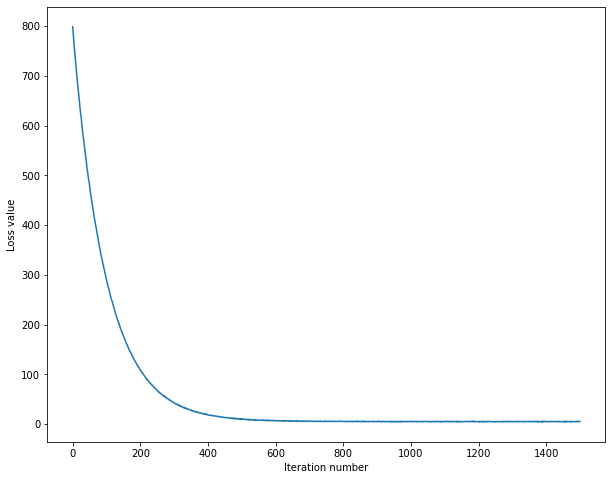

In [94]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [99]:
results = {}
best_val = -1
best_svm = None
# num_iters
learning_rates = [1e-7, 5e-5]
# regularization_strengths = [2.5e4, 5e4]
regularization_strengths = [2e4, 2.5e4, 3e4, 3.5e4, 4e4, 4.5e4, 5e4, 6e4]
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=1500, verbose=True)
        
        y_train_pred = svm.predict(X_train)
        num_correct = np.sum(y_train_pred == y_train)
        train_accuracy = float(num_correct) / num_training
        print('Got %d / %d correct => train_accuracy: %f' % (num_correct, num_training, train_accuracy))
        
        y_val_pred = svm.predict(X_val)
        num_correct = np.sum(y_val_pred == y_val)
        val_accuracy = float(num_correct) / num_validation
        print('Got %d / %d correct => val_accuracy: %f' % (num_correct, num_validation, val_accuracy))
        
        results[(lr,reg)] = (train_accuracy, val_accuracy)
        if(val_accuracy > best_val):
            best_val = val_accuracy
            best_svm = svm
            best_lr = lr
            best_reg = reg
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train arruracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))
    
print('best lr: %e and rg: %e achieved during cross-validation' % (best_lr,best_reg))
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 635.860307
iteration 100 / 1500: loss 284.118672
iteration 200 / 1500: loss 129.753350
iteration 300 / 1500: loss 60.106957
iteration 400 / 1500: loss 29.755447
iteration 500 / 1500: loss 15.791254
iteration 600 / 1500: loss 9.885122
iteration 700 / 1500: loss 7.068177
iteration 800 / 1500: loss 6.273404
iteration 900 / 1500: loss 5.282999
iteration 1000 / 1500: loss 5.921451
iteration 1100 / 1500: loss 5.680598
iteration 1200 / 1500: loss 5.227773
iteration 1300 / 1500: loss 5.170745
iteration 1400 / 1500: loss 5.376043
Got 18470 / 49000 correct => train_accuracy: 0.376939
Got 388 / 1000 correct => val_accuracy: 0.388000
iteration 0 / 1500: loss 783.081240
iteration 100 / 1500: loss 282.879168
iteration 200 / 1500: loss 107.312048
iteration 300 / 1500: loss 42.310108
iteration 400 / 1500: loss 19.749969
iteration 500 / 1500: loss 9.738331
iteration 600 / 1500: loss 6.775363
iteration 700 / 1500: loss 6.366190
iteration 800 / 1500: loss 5.339182
iteration 900 /

Text(0.5, 1.0, 'CIFAR-10 validation accuracy')

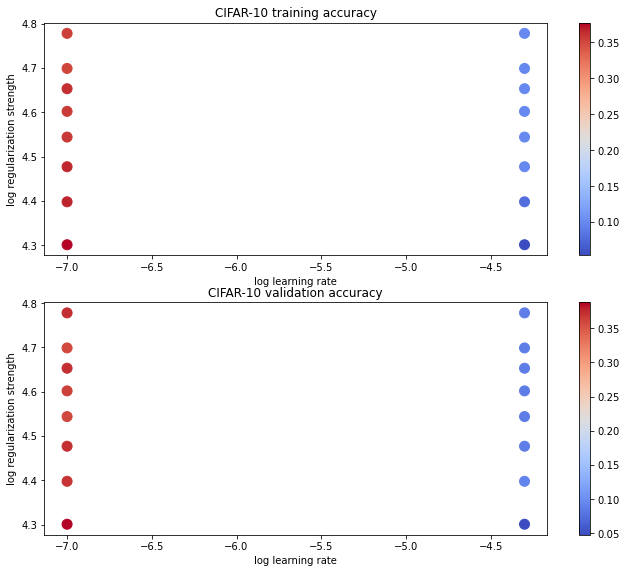

In [100]:
import math
import pdb

# pdb.set_trace()

x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2,1,1)
plt.tight_layout(pad = 3)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

colors = [results[x][1] for x in results]
plt.subplot(2,1,2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')


In [101]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

Linear SVM on raw pixels final test set accuracy: 0.372000


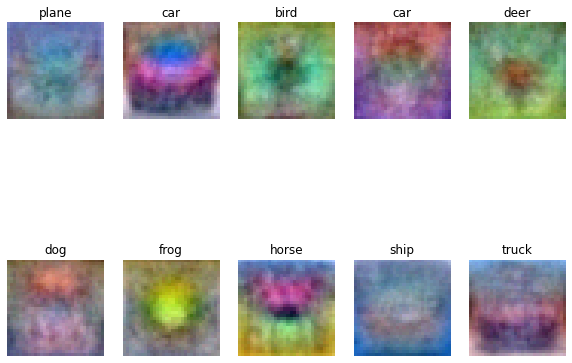

In [102]:
w = best_svm.W[:-1,:]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])